In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('datos/voluntarios.csv')
df.head(2)

,Unnamed: 0,Course,Anglo Status,Date Modified,Age,Veteran,Gender,Nationality,Profession,Request Status,Last minute,Date Modified.1,Modified by,Request,Task,Acompañante,Opted Out,Identificador
0,0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20,Yes,Male,IRELAND,NaN,Cleared,Yes,27/02/2019 14:35,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,Si,Yes,1
1,1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21,Yes,Female,UNITED KINGDOM,NaN,Cleared,Yes,20/03/2019 12:47,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,No,No,2


Parte de la limpieza de la datos tuve que hacerlo en otro Notebook al contener datos personales.

En este DataFrame tenemos las columnas:

Unnamed: Se creo al convertir el anterior dataframe a csv. Hay que eliminarla

Course: El curso al que han asistido

Anglo Status: El estado del voluntario, hay varios

Date Modified: La fecha en que se modificó la inscripción

Age: La edad de cada voluntario

Veteran: Si han asistido a más de un programa

Gender: Male / Female

Nationality: La nacionalidad de cada voluntario

Profession: A que se dedican

Request Status: El estado en que se encuentra la petición

Last Minute: Si pueden unirse al programa en el último momento

Date Modified.1: La fecha en que se hizo la inscripción

Modified by: Quién realizo la modificación en la inscripción

Request: El curso solicitado

Task: Si necesitan volar acompañados como menores

Acompañante: Si viene al curso con alguien

Opted Out: Si ha sido quitado de la lista de emails

Identificador: Es la columna que creamos y sustituye a los nombres


# Vamos a ver el tipo de datos que tenemos

In [3]:
df.dtypes

Unnamed: 0          int64
Course             object
Anglo Status       object
Date Modified      object
Age                 int64
Veteran            object
Gender             object
Nationality        object
Profession         object
Request Status     object
Last minute        object
Date Modified.1    object
Modified by        object
Request            object
Task               object
Acompañante        object
Opted Out          object
Identificador       int64
dtype: object

# Vamos a renombrar las columnas para que no haya espacios en los nombres

In [4]:
nuevas_columnas = {i: i.replace(" ", "_") for i in df.columns}
df.rename(columns= nuevas_columnas, inplace = True)
df.head(1)

,Unnamed:_0,Course,Anglo_Status,Date_Modified,Age,Veteran,Gender,Nationality_,Profession,Request_Status,Last_minute,Date_Modified.1,Modified_by,Request,Task,Acompañante,Opted_Out,Identificador
0,0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20,Yes,Male,IRELAND,NaN,Cleared,Yes,27/02/2019 14:35,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,Si,Yes,1


Parece que Nationality tenía un espacio al final, vamos a quitarle el _

In [5]:
df = df.rename(columns={'Nationality_':'Nationality'})
df.head(1)

,Unnamed:_0,Course,Anglo_Status,Date_Modified,Age,Veteran,Gender,Nationality,Profession,Request_Status,Last_minute,Date_Modified.1,Modified_by,Request,Task,Acompañante,Opted_Out,Identificador
0,0,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20,Yes,Male,IRELAND,NaN,Cleared,Yes,27/02/2019 14:35,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,Si,Yes,1


Todos son objetos, excepto la edad. Una de las cosas que haremos es convertir Date Modified en Date Time

# La columna Unnamed no es necesaria. Voy a eliminarla y mover Identificador como la primera columna

In [6]:
df.drop('Unnamed:_0', inplace=True, axis=1)

df.insert(0, 'Identificador', df.pop('Identificador') )
df.head(3)


,Identificador,Course,Anglo_Status,Date_Modified,Age,Veteran,Gender,Nationality,Profession,Request_Status,Last_minute,Date_Modified.1,Modified_by,Request,Task,Acompañante,Opted_Out
0,1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20,Yes,Male,IRELAND,NaN,Cleared,Yes,27/02/2019 14:35,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,Si,Yes
1,2,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21,Yes,Female,UNITED KINGDOM,NaN,Cleared,Yes,20/03/2019 12:47,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,No,No
2,3,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,12/05/2021 12:02,20,Yes,Female,CANADA,Law student at the University of Birmingham,Veteran,No,22/05/2019 18:18,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,PERMISSION FLIGHT,No,No


# Queremos saber si hay nulos en nuestro DF y el porcentaje que representan

In [7]:
nulos = (df.isnull().sum() / df.shape[0] * 100).reset_index()
nulos = nulos[nulos[0] > 0]
nulos.columns = ["columnas", "%_nulos"]
nulos

,columnas,%_nulos
2,Anglo_Status,0.002213
5,Veteran,4.963150
8,Profession,2.893787
13,Request,0.647367
14,Task,99.651418


# Vamos por los duplicados

In [8]:
df.duplicated().sum()

231

Eliminamos los que tenemos

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

# Obtenemos los principios estadísticos de las variables numéricas y categóricas

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Identificador,90135.0,13234.247129,9236.120353,1.0,4778.0,12658.0,20910.5,31246.0
Age,90135.0,46.515893,18.895335,-49.0,30.0,41.0,65.0,99.0


In [11]:
df.describe(include = "object").T

,count,unique,top,freq
Course,90135,1088,Spain - La Alberca 07/27/2018 to 08/03/2018,807
Anglo_Status,90133,16,Approved,46873
Date_Modified,90135,24768,18/11/2022 11:56,152
Veteran,85651,2,No,55258
Gender,90135,2,Female,58095
Nationality,90135,188,USA,40278
Profession,87525,16133,Student,6792
Request_Status,90135,18,Cleared,39709
Last_minute,90135,2,Yes,47961
Date_Modified.1,90135,41700,26/04/2021 15:31,448


Vemos que la edad mínima es -49, lo cual es imposible. No debería haber nadie menor de 13 años.

Vamos a usar un gráfico para ver si hay muchos valores anómalos

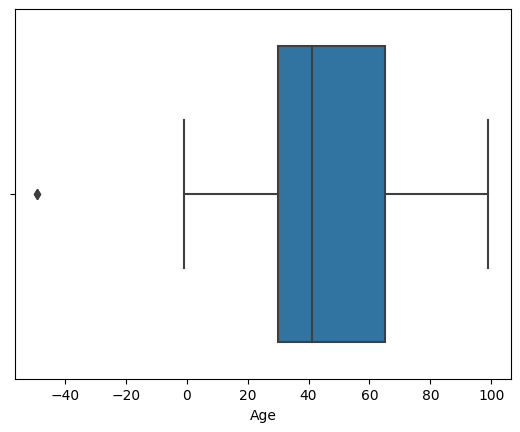

In [12]:
sns.boxplot(x="Age", data=df);

Parece que solo tenemso ese -49. Vamos a ver cual es la moda y utilizarla para sustituir los valores por debajo de 13.

In [13]:
moda=df.Age.mode()

def edades (edad):
    if edad<13:
        return moda
    else:
        return edad

df["Age"]=df["Age"].apply(edades)
df.head(3)

,Identificador,Course,Anglo_Status,Date_Modified,Age,Veteran,Gender,Nationality,Profession,Request_Status,Last_minute,Date_Modified.1,Modified_by,Request,Task,Acompañante,Opted_Out
0,1,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Bad feedback,26/01/2022 13:21,20,Yes,Male,IRELAND,NaN,Cleared,Yes,27/02/2019 14:35,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,Si,Yes
1,2,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,02/12/2019 10:21,21,Yes,Female,UNITED KINGDOM,NaN,Cleared,Yes,20/03/2019 12:47,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,NaN,No,No
2,3,Zujar TEENS - 2 weeks - June/30/2019 to July/1...,Approved,12/05/2021 12:02,20,Yes,Female,CANADA,Law student at the University of Birmingham,Veteran,No,22/05/2019 18:18,arodriguez,Zujar TEENS - 2 weeks - June/30/2019 to July/...,PERMISSION FLIGHT,No,No


Para ver si ha funcionado vamos a ordenar la columna por edades.

Al intentar ordenar me ha dado error, vamos a ver si al cambiar las edades se ha modificado el tipo

In [14]:
df.dtypes

Identificador       int64
Course             object
Anglo_Status       object
Date_Modified      object
Age                object
Veteran            object
Gender             object
Nationality        object
Profession         object
Request_Status     object
Last_minute        object
Date_Modified.1    object
Modified_by        object
Request            object
Task               object
Acompañante        object
Opted_Out          object
dtype: object

Se ha convertido en un objeto, así que hay que cambiarlo a int64 de nuevo

In [15]:
df['Age'] = df['Age'].astype('int64')
df.dtypes

Identificador       int64
Course             object
Anglo_Status       object
Date_Modified      object
Age                 int64
Veteran            object
Gender             object
Nationality        object
Profession         object
Request_Status     object
Last_minute        object
Date_Modified.1    object
Modified_by        object
Request            object
Task               object
Acompañante        object
Opted_Out          object
dtype: object

Ya le hemos cambiado el tipo, vamos a ordenar la columna de edades

In [16]:
edades = df.sort_values('Age')
edades.head(5)

,Identificador,Course,Anglo_Status,Date_Modified,Age,Veteran,Gender,Nationality,Profession,Request_Status,Last_minute,Date_Modified.1,Modified_by,Request,Task,Acompañante,Opted_Out
55932,1331,Germany - Laubach from 12/11/2022 to 12/16/2022,New,16/08/2022 15:32,16,No,Female,USA,Student,Cleared,No,17/08/2022 16:45,arodriguez,Germany - Laubach from 12/11/2022 to 12/16/2022,NaN,Si,No
2357,1331,Spain ? La Alberca 11/18/2022 to 11/25/2022,New,16/08/2022 15:32,16,No,Female,USA,Student,Cleared,No,17/08/2022 16:45,arodriguez,Spain ? La Alberca 11/18/2022 to 11/25/2022,NaN,Si,No
53754,26,INTERESTED IN SUMMER TEEN CAMPS 2018,No Response,15/07/2022 12:17,18,Yes,Female,UNITED KINGDOM,NaN,Cleared,Yes,13/04/2020 12:25,ibelmonte,Summer Camps 2014,NaN,No,Yes
53523,503,INTERESTED IN SUMMER TEEN CAMPS 2020,No Response,01/06/2022 12:21,18,Yes,Female,CANADA,NaN,Cleared,No,04/02/2020 15:03,admin,INTERESTED IN SUMMER TEEN CAMPS 2020,NaN,Si,No
89446,28,BUJARAIZA (BORN IN 2004-2003-2002-2001) TEEN V...,No Response,26/08/2022 16:31,18,Yes,Male,UNITED KINGDOM,NaN,Cleared,Yes,11/06/2020 10:07,arodriguez,BUJARAIZA (BORN IN 2004-2003-2002-2001) TEEN ...,NaN,No,No


Comprobamos que ahora la edad mínima es 16 

# Vamos a separar el Course y Request en fechas y Lugares y vamos a poner las fechas en formato siempre numérico

In [17]:
df["Course"] = df["Course"].str.replace("January","1")
df["Course"] = df["Course"].str.replace("February","2")
df["Course"] = df["Course"].str.replace("March","3")
df["Course"] = df["Course"].str.replace("April","4")
df["Course"] = df["Course"].str.replace("May","5")
df["Course"] = df["Course"].str.replace("June","6")
df["Course"] = df["Course"].str.replace("July","7")
df["Course"] = df["Course"].str.replace("August","8")
df["Course"] = df["Course"].str.replace("September","9")
df["Course"] = df["Course"].str.replace("October","10")
df["Course"] = df["Course"].str.replace("November","11")
df["Course"] = df["Course"].str.replace("December","12")
df.sample(20)

,Identificador,Course,Anglo_Status,Date_Modified,Age,Veteran,Gender,Nationality,Profession,Request_Status,Last_minute,Date_Modified.1,Modified_by,Request,Task,Acompañante,Opted_Out
67467,10817,Germany - Laubach from 04/17/2022 to 04/22/2022,New,27/12/2021 12:21,28,No,Female,USA,Nursing assistant - Medical / Hospital,Cleared,Yes,18/04/2022 16:33,arodriguez,Germany - Laubach from 04/17/2022 to 04/22/2022,NaN,Si,No
73370,20928,Germany - Black Forest from 07/14/2013 to 07/1...,No Response,29/07/2013 9:31,35,No,Male,IRELAND,"English teacher, Physical Therapist, Psycholog...",Program Full,Yes,04/06/2013 18:07,lnightingale,Germany - Black Forest from 07/14/2013 to 07/...,NaN,No,No
23030,12049,Spain - Doña Teresa 07/05/2019 to 07/12/2019,Approved,27/06/2022 15:40,23,No,Female,UNITED KINGDOM,Student,Program Full,No,03/07/2019 9:25,arodriguez,Spain - Doña Teresa 07/05/2019 to 07/12/2019,NaN,No,Yes
31306,16266,La Alberca 10/21/2011-10/28/2011,Approved,12/12/2011 16:23,66,No,Female,CANADA,Accountant,Not available,Yes,02/08/2011 16:00,jprinsloo,La Alberca 10/21/2011-10/28/2011,NaN,No,No
4159,1186,Spain ? Cofrentes 04/17/2022 to 04/23/2022,Approved,08/06/2020 13:17,68,No,Female,USA,English Teacher/Trainer,Cleared,No,19/11/2020 10:45,arodriguez,Spain-Cofrentes VALENCIAN TEACHERS 07/31/2020...,NaN,No,No
52952,25094,La Alberca 01/14/2011-01/21/2011,Approved,04/03/2015 17:20,34,Yes,Male,IRELAND,Unemployed,Cancelled,No,29/06/2012 13:42,admin,La Alberca 01/14/2011-01/21/2011,NaN,No,No
89364,20001,Candeleda (ADULTS) from 07/29/2011-08/05/2011,Bad feedback,16/07/2015 16:47,44,Yes,Female,UNITED KINGDOM,Teacher,Rejected by Anglo - Date not Suitable,No,19/07/2011 10:52,AngloHelp,Candeleda (ADULTS) from 29/07/11-05/08/11,NaN,No,Yes
53010,122,Jerez TEENS - 2 weeks - 7/2/2017 to 7/15/2017,Approved,09/03/2022 12:07,23,No,Male,IRELAND,NaN,Cleared,Yes,11/05/2017 12:13,arodriguez,Jerez TEENS - 2 weeks - July/2/2017 to July/1...,NaN,No,No
75145,26851,Germany - Altmühltal from 11/26/2017 to 12/01/...,No Response,27/09/2017 11:47,28,No,Female,SOUTH AFRICA,Student,Rejected,No,27/09/2017 11:47,arodriguez,Germany - Altmühltal from 11/26/2017 to 12/01...,NaN,No,No
78807,13596,Doña Teresa 08/24/2012 a 08/31/2012,No Response,13/06/2012 12:26,52,No,Female,USA,Pharmacy Tech,Rejected,Yes,13/06/2012 12:26,abarratt,Doña Teresa 24/08/2012 a 31/08/2012,NaN,Si,No


# Vamos a ver las nacionalidades más recurrentes y representarlas en una gráfica

In [18]:
df_pais = pd.DataFrame(df.groupby(['Nationality'])
                      ["Identificador"].count()).reset_index()

df_pais = df_pais.sort_values('Identificador',ascending=False).reset_index()
df_pie=df_pais[:10]
df_pie

,index,Nationality,Identificador
0,179,USA,40278
1,175,UNITED KINGDOM,14981
2,38,CANADA,8304
3,85,INDIA,4877
4,89,IRELAND,2880
5,11,AUSTRALIA,2709
6,127,NIGERIA,1369
7,119,MOROCCO,1248
8,153,SOUTH AFRICA,880
9,137,PHILIPPINES,822


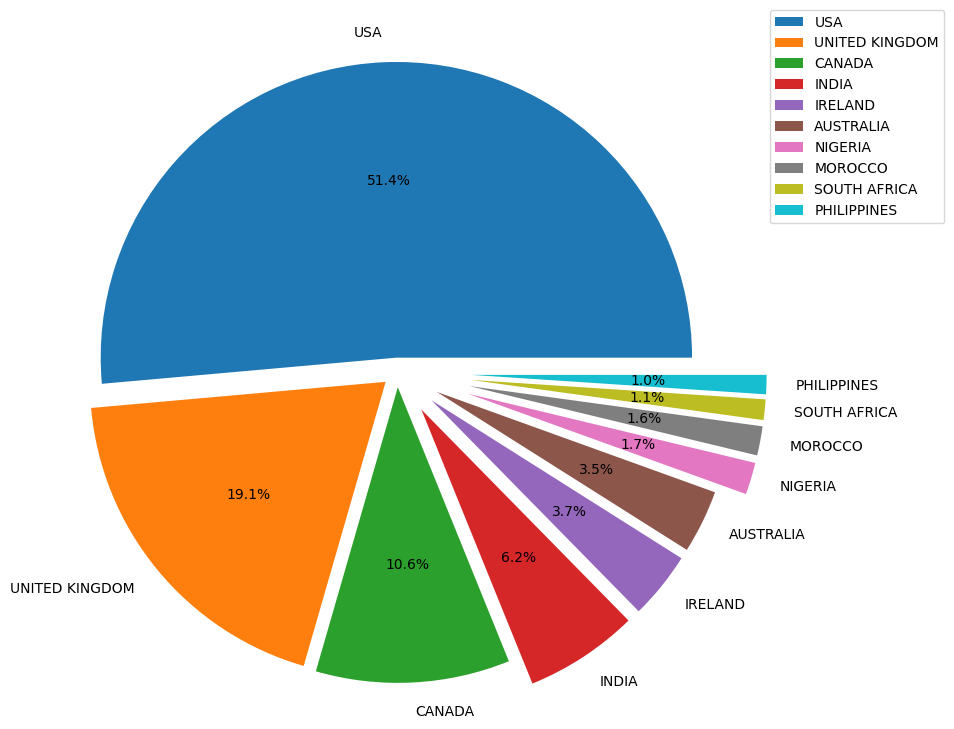

In [19]:
explode = (0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.5, 0.5,0.5,0.5)

plt.pie(df_pie['Identificador'], 
    labels = df_pie['Nationality'], 
    autopct = '%1.1f%%', 
    radius=2,
    explode=explode
)

plt.legend(bbox_to_anchor = (2, 1.5));

# Vamos a ver en que años se registró más gente y si hubo un cambio de dinámica después del COVID

Primero cambiamos el tipo de columna a Date time

In [20]:
df['Date _Modified.1'] = df['Date_Modified.1'].apply(pd.to_datetime)
df['Date _Modified'] = df['Date_Modified'].apply(pd.to_datetime)
df.dtypes

Identificador                int64
Course                      object
Anglo_Status                object
Date_Modified               object
Age                          int64
Veteran                     object
Gender                      object
Nationality                 object
Profession                  object
Request_Status              object
Last_minute                 object
Date_Modified.1             object
Modified_by                 object
Request                     object
Task                        object
Acompañante                 object
Opted_Out                   object
Date _Modified.1    datetime64[ns]
Date _Modified      datetime64[ns]
dtype: object

In [24]:
df["Año_inscripción"]=df["Date _Modified.1"].dt.year
df["Mes_inscripción"]=df["Date _Modified.1"].dt.month

print(df["Año_inscripción"].unique())
print(df["Mes_inscripción"].unique())

[2019 2017 2018 2020 2021 2012 2014 2013 2015 2016 2022 2011 1970]
[ 2  3  5 11  4  8 12  7  6  1  9 10]


In [28]:
df_año = pd.DataFrame(df.groupby(['Año_inscripción'])
                      ["Identificador"].count())

df_año = df_año.sort_values('Identificador',ascending=False)

df_año

,Identificador
Año_inscripción,
2018,13004
2017,12637
2019,10468
2015,7934
2016,7856
2014,6858
2013,6501
2012,6377
2022,5694


In [ ]:
print(df["Anglo_Status"].unique())
print(df["Request_Status"].unique())

df_npd.sort_values(by =["Age"], axis=0)

moda=df_npd.Age.mode()
moda=int(moda)
print(type(moda))

df_npd

df_npd.loc[df_npd['Age'].between(0, 17, 'both'), 'Group'] = 'Teens'
df_npd.loc[df_npd['Age'].between(17, 23, 'right'), 'Group'] = 'Twenties'
df_npd.loc[df_npd['Age'].between(23, 30, 'right'), 'Group'] = 'Adultos hasta 30'
df_npd.loc[df_npd['Age'].between(30, 40, 'right'), 'Group'] = 'Adultos 30-40'
df_npd.loc[df_npd['Age'].between(40, 50, 'right'), 'Group'] = 'Adultos 40-50'
df_npd.loc[df_npd['Age'].between(50, 60, 'right'), 'Group'] = 'Adultos 50-60'
df_npd.loc[df_npd['Age'].between(60, 70, 'right'), 'Group'] = 'Adultos 60-70'
df_npd.loc[df_npd['Age'].between(70, 100, 'right'), 'Group'] = 'Adultos más de 70'

df_npd.head(2)

df_edades = pd.DataFrame(df_npd.groupby(['Group'])["Identificador"].count()).reset_index()
df_edades

explode = (0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.5, 0.5)

plt.pie(df_edades['Identificador'], 
    labels = df_edades['Group'], 
    autopct = '%1.1f%%', 
    radius=2,
    explode=explode
)

plt.legend(bbox_to_anchor = (2, 1.5));

def edades (edad):

lista_edades = df_npd['Age'].tolist()
import statistics
moda = statistics.mode(lista_edades)

for index,edad in enumerate(lista_edades):
    if edad<10:
        lista_edades[index]=moda
        
print(lista_edades)

lista_edades = df_npd['Age'].tolist()
rangos = range(min(lista_edades), max(lista_edades) + 10)
frecuencias, bordes = np.histogram(lista_edades, bins=rangos)

max(lista_edades)
min(lista_edades)

lista_edades.remove(-49)
lista_edades.sort()
print(lista_edades)

df_npd["Año_inscripción"].value_counts()
df_npd["Mes_inscripción"].value_counts()

import calendar
meses_numericos = sorted(list(df_npd["Mes_inscripción"].unique()))
meses_letras = list(calendar.month_name)[1:]

diccionario = dict(zip(meses_numericos, meses_letras))
diccionario

def formatear_mes(mes, diccionario_conversion = diccionario):
    return diccionario[mes]

df_npd["Mes_inscripción"] = df_npd["Mes_inscripción"].apply(formatear_mes)
df_npd.head(3)

df_años=pd.DataFrame(df_npd["Año_inscripción"].value_counts())
df_años

sns.displot(df_años.Año_inscripción,
            facecolor ='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            kde=True, 
            color = "black",
            height = 10, # establecer la altura de la gráfica
            aspect =0.9); 